# TensorFlow Tutorial 4
Convolutional Neural Networks

Link: https://developers.google.com/learn/pathways/tensorflow?hl=en#codelab-https://developers.google.com/codelabs/tensorflow-4-cnns

In [1]:
import tensorflow as tf

In [2]:
# LOAD DATA

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [4]:
# MODEL
# with convolutions and pooling layers 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# COMPILE

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
# TRAIN THE MODEL

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.6141 - accuracy: 0.7779
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3107 - accuracy: 0.8871
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2598 - accuracy: 0.9037
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.2183 - accuracy: 0.9180
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1877 - accuracy: 0.9287


In [7]:
# EVALUATE ON TEST SET

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 4s 12ms/step - loss: 0.2544 - accuracy: 0.9106
Test loss: 0.25438541173934937, Test accuracy: 91.06000065803528


### Visualise the convolutions and pooling

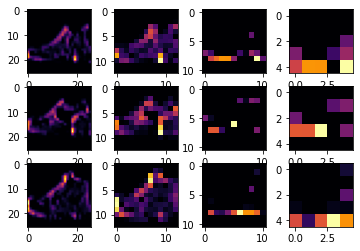

In [8]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 6

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)